# Confidence Interval

<img src='https://www.statisticshowto.com/wp-content/uploads/2021/12/confidence-limits.bmp'>

# Importing necessary Package

In [1]:
from pyforest import *

# Loading Dataset

In [2]:
df = pd.read_csv('titanic_train.csv')
df.head()

<IPython.core.display.Javascript object>

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
ages = df.Age.dropna()
ages.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [4]:
len(ages)

714

In [5]:
avg_age = np.mean(ages) 
max_age = np.max(ages)
min_age = np.min(ages)
std_age = np.std(ages)
print(f'Average age: {avg_age}')
print(f'Maximum age: {max_age}')
print(f'Minimum age: {min_age}')
print(f'Standard deviation in age: {std_age}')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Average age: 29.69911764705882
Maximum age: 80.0
Minimum age: 0.42
Standard deviation in age: 14.516321150817317


In [6]:
ages.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

# Visualizing Age Distribution:

<Axes: ylabel='Density'>

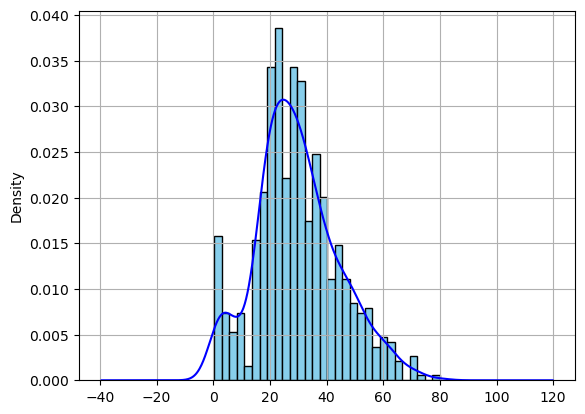

In [7]:
ages.plot(kind='hist', bins=30, grid= True,density=True, edgecolor='black' ,color='skyblue')
ages.plot(kind='kde', color='blue', grid= True)

<IPython.core.display.Javascript object>

<Axes: xlabel='Age', ylabel='Count'>

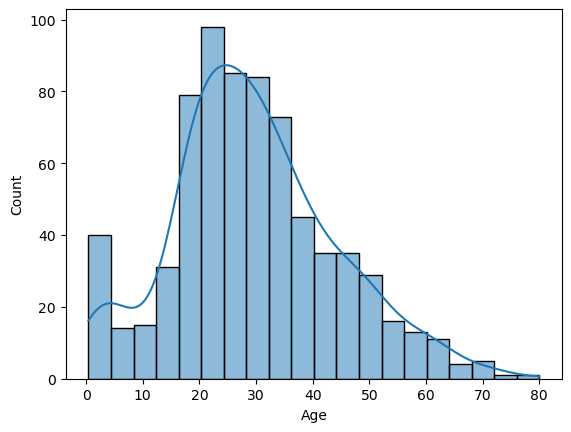

In [8]:
sns.histplot(ages, kde= True)

<IPython.core.display.Javascript object>

<Axes: xlabel='Age', ylabel='Density'>

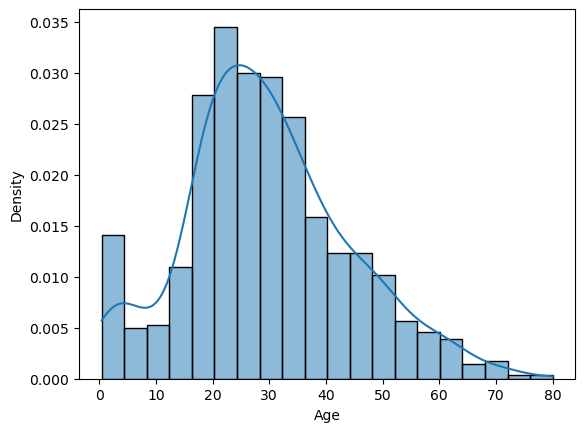

In [9]:
sns.histplot(ages, kde= True, stat = 'density')

<Axes: >

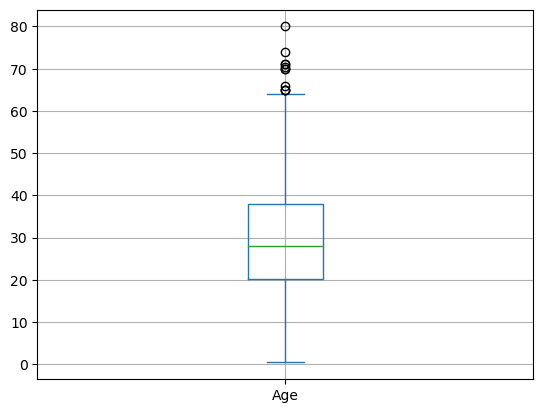

In [10]:
ages.plot(kind='box',grid= True)

In [11]:
sample_age = ages.sample(10, replace=True)
sample_age

852     9.0
851    74.0
494    21.0
645    48.0
615    24.0
632    32.0
672    70.0
183     1.0
141    22.0
16      2.0
Name: Age, dtype: float64

In [12]:
avg_sample_age = np.mean(sample_age)
print(f'Average of sample age:{avg_sample_age}')

<IPython.core.display.Javascript object>

Average of sample age:30.3


In [13]:
def get_all_sample_means(data, n=10, n_samples=100):
    
    #
    sample_age = np.random.choice(data,size=(n_samples,n))
    avg_sample_age = np.mean(sample_age, axis=1)
    #
    return avg_sample_age

In [14]:
samples = get_all_sample_means(ages,n=10, n_samples=10**3)
samples

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([36.4  , 32.9  , 33.3  , 29.3  , 31.2  , 25.525, 31.2  , 31.65 ,
       28.05 , 24.342, 26.2  , 29.2  , 30.9  , 31.9  , 30.842, 32.4  ,
       25.1  , 21.6  , 34.55 , 23.25 , 25.5  , 26.4  , 30.   , 26.2  ,
       29.3  , 32.9  , 26.4  , 23.5  , 36.4  , 30.2  , 32.2  , 30.25 ,
       30.3  , 31.3  , 21.6  , 22.4  , 33.3  , 23.95 , 43.8  , 30.5  ,
       28.35 , 28.942, 32.1  , 37.5  , 31.85 , 25.15 , 33.7  , 36.5  ,
       30.75 , 28.4  , 29.4  , 32.9  , 30.4  , 29.   , 30.35 , 33.4  ,
       25.   , 28.542, 35.5  , 32.9  , 27.1  , 21.85 , 30.875, 26.125,
       42.4  , 24.2  , 25.45 , 33.   , 32.1  , 26.183, 37.2  , 26.9  ,
       24.8  , 28.8  , 26.075, 26.8  , 20.975, 39.95 , 31.55 , 34.4  ,
       23.842, 27.9  , 29.5  , 35.1  , 29.7  , 22.7  , 34.55 , 34.9  ,
       28.6  , 26.55 , 27.5  , 30.9  , 23.392, 22.642, 30.75 , 34.4  ,
       28.45 , 30.8  , 26.6  , 33.85 , 33.   , 29.475, 31.4  , 39.5  ,
       29.2  , 30.5  , 32.4  , 32.25 , 29.8  , 25.15 , 21.4  , 33.6  ,
      

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

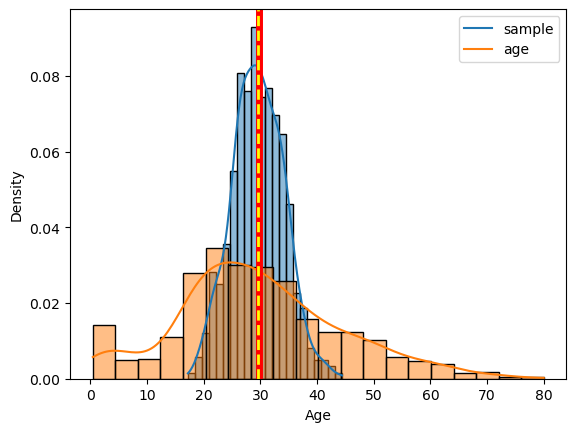

In [15]:
sns.histplot(samples, kde=True, stat = 'density', )
sns.histplot(ages, kde=True, stat= 'density')
plt.axvline(ages.mean(), color='red', lw=5,)
plt.axvline(samples.mean(), color='yellow', lw=2, ls='--')
plt.legend(['sample','age'])

# Bootstarp Sampling

Bootstrapping is a resampling technique that involves generating multiple datasets (bootstrap samples) from a single sample with replacement. Each bootstrap sample is of the same size as the original sample. Bootstrapping is used for various purposes, and its key advantages include:

- **Estimating Population Parameters:**
Bootstrapping allows for the estimation of population parameters, such as the mean or standard deviation, by repeatedly resampling from the observed data.

- **Assessing Variability:**
By generating multiple bootstrap samples, bootstrapping provides insights into the variability of sample statistics. This is particularly useful for understanding the uncertainty associated with estimated parameters.
- **Creating Confidence Intervals:**
Bootstrapping is often employed to construct confidence intervals around sample statistics. These intervals provide a range within which the true population parameter is likely to fall.
- **Handling Non-Normality:**
Bootstrapping is robust and does not rely on assumptions of normality. It can be applied to non-normally distributed data, making it versatile for various types of datasets.
- **Model Validation:**
In machine learning and model development, bootstrapping can be used for resampling to assess the stability and generalizability of a predictive model.

In [16]:
def bootstrap_sample(sample, n_samples=10**4):
    '''
    Bootstrap Sampling is a method that involves drawing of sample data 
    repeatedly with replacement from a data source to estimate a population 
    parameter.
    
    Random sampling with replacement.
    '''
    #
    bs_sample_means = get_all_sample_means(
        sample, 
        n=len(sample),
        n_samples=n_samples
    )
    
    return bs_sample_means

In [17]:
b_sample_means = bootstrap_sample(sample_age)
b_sample_means


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([37.9, 19.5, 27.8, ..., 30.9, 29.3, 28.5])

In [18]:
len(b_sample_means)

10000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

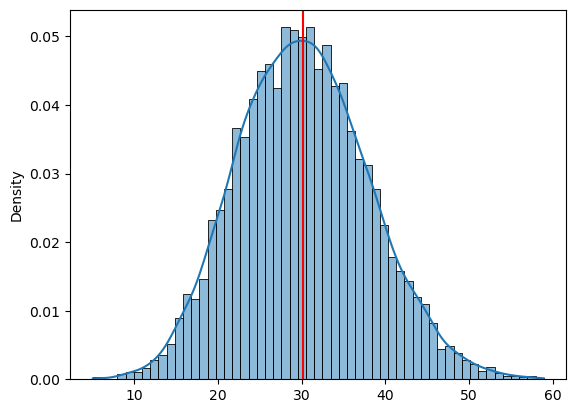

In [19]:
sns.histplot(b_sample_means, kde=True, stat = 'density', )
plt.axvline(b_sample_means.mean(), color='red')

In [20]:
# standard Deviation
mean_bsample = b_sample_means.mean()
sigma = b_sample_means.std()
sigma2= 2* sigma
print(f'mean of bootsrap sampling = {mean_bsample}')
print(f'1st standard deviation of bootsrap sampling = {sigma}')
print(f'2nd standard deviation of bootsrap sampling = {sigma2}')

mean of bootsrap sampling = 30.230659999999997
1st standard deviation of bootsrap sampling = 7.785627653850394
2nd standard deviation of bootsrap sampling = 15.571255307700788


# Confidence limits
Confidence limits are a pair of numbers used to describe an estimate or other characteristic of a population. They are the upper and lower boundaries of confidence intervals

In [21]:
upper_limit = mean_bsample +sigma2 
lower_limit = mean_bsample- sigma2
confidence_limit =(lower_limit, upper_limit)
print(f'Confidence limit : {confidence_limit}')

Confidence limit : (14.659404692299209, 45.80191530770078)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

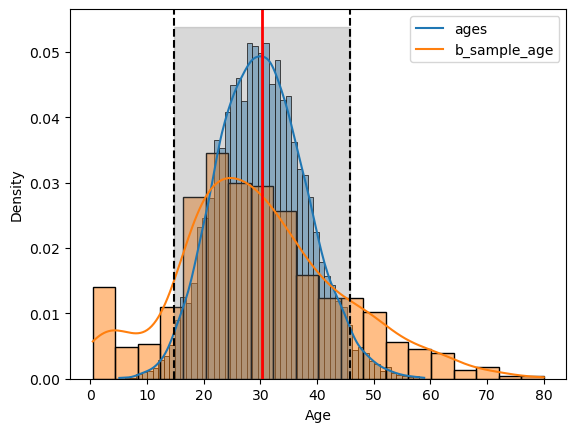

In [22]:
sns.histplot(b_sample_means, kde=True, stat = 'density',)
sns.histplot(ages, kde=True, stat = 'density',)
plt.legend(['ages','b_sample_age'])
plt.axvline(mean_bsample , color='red',lw=2)
plt.axvline(mean_bsample -sigma2 , color='black',ls='--')
plt.axvline(mean_bsample +sigma2 , color='black',ls='--')
plt.fill_betweenx(y=np.linspace(0, plt.ylim()[1], 100), 
                  x1=lower_limit, x2=upper_limit, color='gray', alpha=0.3)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

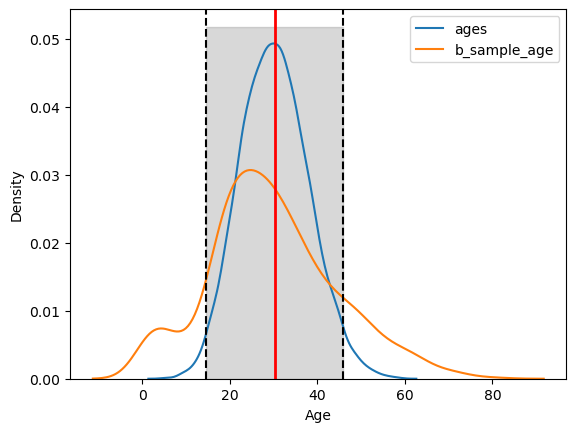

In [23]:
sns.kdeplot(b_sample_means)
sns.kdeplot(ages)
plt.legend(['ages','b_sample_age'])
plt.axvline(mean_bsample , color='red',lw=2)
plt.axvline(lower_limit , color='black',ls='--')
plt.axvline(upper_limit, color='black',ls='--')
plt.fill_betweenx(y=np.linspace(0, plt.ylim()[1], 100), 
                  x1=lower_limit, x2=upper_limit, color='gray', alpha=0.3)
plt.show()

# Finding Confidence Interval

In [24]:
import scipy.stats

normal_curve = scipy.stats.norm(mean_bsample,sigma)
normal_curve.cdf(upper_limit) - normal_curve.cdf(lower_limit)

0.9544997361036416

The code primarily focuses on exploring and visualizing the age distribution in the Titanic dataset, performing bootstrap sampling to estimate population parameters, and calculating a confidence interval. The visualizations and statistical measures provide insights into the age characteristics of the dataset, and bootstrap sampling is used to quantify the uncertainty in the estimates.